In [1]:
import _functions

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib

# PREPROCESSING
label -> dummies

In [3]:
df_TESS = pd.read_csv('TESS_mfcc20_labels.csv')
df_RAVDESS = pd.read_csv('RAVDESS_mfcc20_labels.csv')

In [4]:
df = pd.concat([df_TESS, df_RAVDESS], ignore_index=True)

In [5]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # shuffle

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,label_angry,label_disgust,label_fear,label_happy,label_neutral,label_sad,label_surprise
0,-484.28152,190.620290,-19.982420,-7.379053,6.886962,9.451779,-32.918880,-4.751101,-5.306405,-14.028688,...,-19.252283,4.021437,2.462507,0,0,0,0,0,0,1
1,-423.34738,128.137880,-38.736576,-2.538193,-5.109863,-5.815287,-25.097466,4.818570,-9.883142,-21.609966,...,-9.840059,-8.376751,-7.290752,0,0,0,1,0,0,0
2,-413.89697,119.661860,45.043938,16.279648,-25.634290,18.136494,32.434470,-10.117468,-7.974312,-4.156151,...,-12.421453,5.662510,-12.030071,0,0,0,0,0,1,0
3,-401.95910,107.207634,-33.677914,6.929764,-39.821465,-9.657510,-24.399527,7.633095,-8.682779,-1.229950,...,-1.547133,-15.708506,-12.984270,0,0,1,0,0,0,0
4,-1130.40670,0.620979,0.601525,0.380030,0.384768,-0.146482,-0.242339,0.198292,-0.088879,-0.029896,...,-0.018891,0.030010,0.016930,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221337,-373.76135,103.443210,-52.152718,5.669592,4.619186,14.527122,-40.999783,-19.006275,-38.708390,-13.996713,...,-12.038505,-15.338175,12.051783,0,0,1,0,0,0,0
221338,-422.11627,155.553590,-21.273996,18.021603,-35.250275,18.775220,-6.803190,-5.991980,-15.721129,-8.296847,...,-9.615645,-8.497351,-0.375126,0,0,1,0,0,0,0
221339,-1131.37080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0,0,1,0,0,0
221340,-853.54553,67.554060,6.833282,-2.002909,-2.342067,1.661047,-1.675637,3.801647,-15.293038,-12.283855,...,10.554155,8.286928,3.458775,0,0,0,0,1,0,0


In [7]:
df = pd.get_dummies(df, columns=['label'])

In [8]:
label_columns = [col for col in df.columns if col.startswith('label_')]

In [9]:
X = df.drop(columns=label_columns)
Y = df[label_columns]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2
)

# MODEL 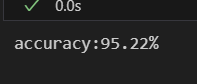

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
model_knn = KNeighborsClassifier()

In [13]:
param_grid = {
    'n_neighbors': [3, 4],
    'weights': ['distance'],
    'algorithm': ['auto'],  # Add algorithms to explore
}

In [14]:
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid)

In [15]:
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': [3, 4],
                         'weights': ['distance']})

In [16]:
joblib.dump(model_knn, 'model_KNN.joblib')

['model_KNN.joblib']

In [17]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [18]:
Y_pred = grid_search.predict(X_test)

In [19]:
# Convert one-hot encoded predictions back to labels
Y_pred_labels = Y_pred.argmax(axis=1)
Y_test_labels = Y_test.values.argmax(axis=1)

In [20]:
print(f'accuracy:{accuracy_score(y_true=Y_test_labels, y_pred=Y_pred_labels):.2%}')

accuracy:95.24%
